# Wine Analysis 

By Stuart Murphy and Nick Zauner
***

### Import statements and custom functions

In [1]:
%matplotlib inline
#from clean_data import *
from functions import *
import pandas as pd

### Clean data

Data collected from [Wine Enthusiast](https://www.winemag.com/) by way of Kaggle

In [4]:
raw_df = pd.read_csv('Data/winemag-data-130k-v2.csv')

In [7]:
wine_df = clean_df(raw_df)

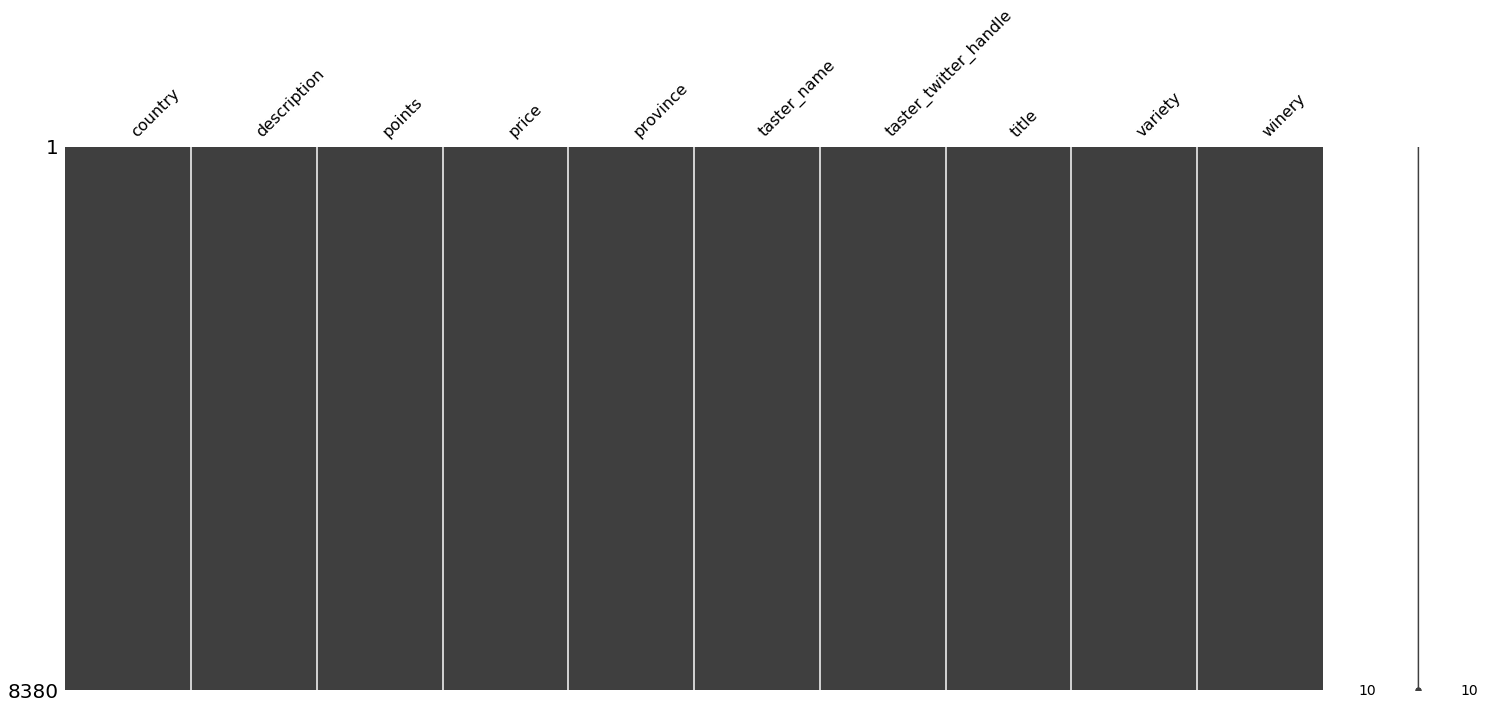

In [8]:
missingno.matrix(wine_df)

In [9]:
wine_df.groupby("country")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Argentina,251.0,21.741036,12.458919,8.0,13.00,18.0,25.00,75.0
Australia,128.0,30.875000,21.598338,8.0,16.00,20.0,37.50,95.0
Austria,272.0,25.132353,12.504942,11.0,17.00,22.0,29.25,80.0
Brazil,3.0,13.000000,1.732051,12.0,12.00,12.0,13.50,15.0
Bulgaria,8.0,12.125000,2.642374,9.0,10.75,11.0,14.00,17.0
Canada,29.0,35.413793,19.223344,15.0,23.00,32.0,38.00,95.0
Chile,290.0,18.706897,11.590786,5.0,12.00,15.0,20.00,85.0
Croatia,1.0,27.000000,NaN,27.0,27.00,27.0,27.00,27.0
Cyprus,1.0,14.000000,NaN,14.0,14.00,14.0,14.00,14.0
